<a href="https://colab.research.google.com/github/Akashsky123/Deep-Learning-Lab/blob/main/Experiment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##   Install Dependencies

In [1]:
# Install required packages (uncomment if needed)
# !pip install torch numpy matplotlib PyPDF2

print("✓ Installation complete!")

✓ Installation complete!


##  Import Libraries and Setup

In [2]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
import time
import warnings
import io
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f" Using device: {device}")

 Using device: cuda


 Upload Dataset (PDF File)

In [3]:
!pip install PyPDF2

from google.colab import files
import PyPDF2

print(" Please upload the poems-100.pdf file:")
uploaded = files.upload()

# Extract text from uploaded PDF
poems_text = ""
for filename in uploaded.keys():
    print(f"\n Processing file: {filename}")

    # Read PDF
    pdf_file = io.BytesIO(uploaded[filename])
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Extract text from all pages
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        poems_text += page.extract_text()

    print(f" Extracted {len(poems_text)} characters from PDF")

# Display first 500 characters
print("\n First 500 characters of the dataset:")
print("="*80)
print(poems_text[:500])
print("="*80)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.8 MB/s eta 0:00:00
 Please upload the poems-100.pdf file:


Saving poems-100.pdf to poems-100.pdf

 Processing file: poems-100.pdf
 Extracted 138736 characters from PDF

 First 500 characters of the dataset:
text
O my Luve's like a red, red rose
That’s newly sprung in June;
O my Luve's like the melodie
That’s sweetly play'd in tune.
As fair art thou, my bonnie lass,
So deep in luve am I:
And I will luve thee still, my dear,
Till a’ the seas gang dry:
Till a’ the seas gang dry, my dear,
And the rocks melt wi’ the sun:
I will luve thee still, my dear,
While the sands o’ life shall run.
And fare thee well, my only Luve
And fare thee well, a while!
And I will come again, my Luve,
Tho’ it were ten thousa


 Alternative - Use Default Dataset (If Upload Fails)

In [4]:
# Uncomment this cell if you have issues with PDF upload
# This provides a default dataset of poems

"""
print("Using default embedded dataset...")

poems_text = '''O my Luve's like a red, red rose
That's newly sprung in June;
O my Luve's like the melodie
That's sweetly play'd in tune.

How do I love thee? Let me count the ways.
I love thee to the depth and breadth and height
My soul can reach, when feeling out of sight
For the ends of being and ideal grace.

She walks in beauty, like the night
Of cloudless climes and starry skies;
And all that's best of dark and bright
Meet in her aspect and her eyes.

Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date.

I think that I shall never see
A poem lovely as a tree.
A tree whose hungry mouth is prest
Against the earth's sweet flowing breast.

Whose woods these are I think I know.
His house is in the village, though;
He will not see me stopping here
To watch his woods fill up with snow.

Wild Nights! Wild Nights!
Were I with thee,
Wild Nights should be
Our luxury!

The world is too much with us; late and soon,
Getting and spending, we lay waste our powers:
Little we see in Nature that is ours;
We have given our hearts away, a sordid boon!'''

print(f"✓ Default dataset loaded: {len(poems_text)} characters")
"""

print(" Uncomment this cell if PDF upload doesn't work")

 Uncomment this cell if PDF upload doesn't work


 Text Preprocessing and Vocabulary Creation

In [5]:
def preprocess_text(text):
    """Preprocess text: lowercase and split into words"""
    text = text.lower()
    words = text.split()
    return words

def create_vocabulary(words):
    """Create word-to-index and index-to-word mappings"""
    word_counts = Counter(words)
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    word_to_idx = {word: idx for idx, (word, _) in enumerate(sorted_words)}
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}
    return word_to_idx, idx_to_word

# Preprocess
words = preprocess_text(poems_text)
word_to_idx, idx_to_word = create_vocabulary(words)
vocab_size = len(word_to_idx)

print(f"\n Dataset Statistics:")
print(f"  Vocabulary size: {vocab_size}")
print(f"  Total words: {len(words)}")
print(f"  Unique words: {len(set(words))}")
print(f"\n Top 20 most frequent words:")
print(f"  {list(word_to_idx.keys())[:20]}")


 Dataset Statistics:
  Vocabulary size: 6998
  Total words: 24714
  Unique words: 6998

 Top 20 most frequent words:
  ['the', 'and', 'of', 'i', 'to', 'in', 'a', 'my', 'is', 'with', 'that', 'not', 'it', 'you', 'or', 'for', 'his', 'as', 'me', 'on']


 Create Training Sequences

In [6]:
def create_sequences(words, word_to_idx, seq_length=5):
    """Create input-output sequences for training"""
    sequences = []
    targets = []

    for i in range(len(words) - seq_length):
        seq = words[i:i + seq_length]
        target = words[i + seq_length]
        sequences.append([word_to_idx[w] for w in seq])
        targets.append(word_to_idx[target])

    return np.array(sequences), np.array(targets)

# Create sequences
SEQ_LENGTH = 5
X, y = create_sequences(words, word_to_idx, SEQ_LENGTH)

print(f"\n Sequence Information:")
print(f"  Sequence length: {SEQ_LENGTH}")
print(f"  Number of training samples: {len(X)}")
print(f"\n Example sequences:")
print(f"  Input:  {[idx_to_word[idx] for idx in X[0]]}")
print(f"  Target: {idx_to_word[y[0]]}")
print(f"\n  Input:  {[idx_to_word[idx] for idx in X[10]]}")
print(f"  Target: {idx_to_word[y[10]]}")


 Sequence Information:
  Sequence length: 5
  Number of training samples: 24709

 Example sequences:
  Input:  ['text', 'o', 'my', "luve's", 'like']
  Target: a

  Input:  ['newly', 'sprung', 'in', 'june;', 'o']
  Target: my


 PART 1 - RNN From Scratch (NumPy)

In [7]:
print("\n" + "="*80)
print("PART 1: RNN IMPLEMENTATION FROM SCRATCH USING NUMPY")
print("="*80)

class SimpleRNN_NumPy:
    """Simple RNN implementation from scratch using NumPy"""

    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_size = hidden_size

        # Initialize weights
        self.Wxh = np.random.randn(hidden_size, input_size) * 0.01
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01
        self.Why = np.random.randn(output_size, hidden_size) * 0.01

        # Initialize biases
        self.bh = np.zeros((hidden_size, 1))
        self.by = np.zeros((output_size, 1))

    def forward(self, inputs, h_prev):
        """Forward pass through RNN"""
        hidden_states = {-1: h_prev}
        outputs = {}

        for t, x in enumerate(inputs):
            x = x.reshape(-1, 1) if x.ndim == 1 else x
            hidden_states[t] = np.tanh(
                np.dot(self.Wxh, x) +
                np.dot(self.Whh, hidden_states[t-1]) +
                self.bh
            )
            outputs[t] = np.dot(self.Why, hidden_states[t]) + self.by

        return outputs, hidden_states

    @staticmethod
    def softmax(x):
        """Compute softmax"""
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum(axis=0, keepdims=True)

    def sample(self, seed_idx, n_words, idx_to_word):
        """Generate text by sampling"""
        h = np.zeros((self.hidden_size, 1))
        idx = seed_idx
        generated = []

        for _ in range(n_words):
            x = np.zeros((len(idx_to_word), 1))
            x[idx] = 1
            outputs, hidden_states = self.forward([x], h)
            h = hidden_states[0]
            probs = self.softmax(outputs[0])
            idx = np.random.choice(range(len(idx_to_word)), p=probs.ravel())
            generated.append(idx_to_word[idx])

        return ' '.join(generated)

# Initialize NumPy RNN
numpy_rnn = SimpleRNN_NumPy(vocab_size, 64, vocab_size)

print(f"\n NumPy RNN Initialized")
print(f"  Input size:  {vocab_size}")
print(f"  Hidden size: 64")
print(f"  Output size: {vocab_size}")

# Test generation with untrained model
print(f"\n Random generation (untrained model):")
print(f"  {numpy_rnn.sample(0, 20, idx_to_word)}")


PART 1: RNN IMPLEMENTATION FROM SCRATCH USING NUMPY

 NumPy RNN Initialized
  Input size:  6998
  Hidden size: 64
  Output size: 6998

 Random generation (untrained model):
  base honey'd morning: brood-cow hairy roll'd-up garden, enclosing roar, fire music belt night-wandering night, click melodie dung rose-bud settling printer


 PART 2 - One-Hot Encoding Dataset & Model

In [8]:
print("\n" + "="*80)
print("PART 2: ONE-HOT ENCODING APPROACH")
print("="*80)

class OneHotDataset(Dataset):
    """Dataset for one-hot encoded sequences"""

    def __init__(self, sequences, targets, vocab_size):
        self.sequences = sequences
        self.targets = targets
        self.vocab_size = vocab_size

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq_one_hot = np.zeros((len(self.sequences[idx]), self.vocab_size))
        for i, word_idx in enumerate(self.sequences[idx]):
            seq_one_hot[i, word_idx] = 1
        return torch.FloatTensor(seq_one_hot), torch.LongTensor([self.targets[idx]])

class RNN_OneHot(nn.Module):
    """RNN model with one-hot encoding"""

    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(RNN_OneHot, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Create dataset and dataloader
onehot_dataset = OneHotDataset(X, y, vocab_size)
onehot_loader = DataLoader(onehot_dataset, batch_size=32, shuffle=True)

# Initialize model
onehot_model = RNN_OneHot(vocab_size, 128, vocab_size, num_layers=2)
onehot_model = onehot_model.to(device)

print(f"\n One-Hot RNN Model Created")
print(f"  Total parameters: {sum(p.numel() for p in onehot_model.parameters()):,}")
print(f"\n Model Architecture:")
print(onehot_model)


PART 2: ONE-HOT ENCODING APPROACH

 One-Hot RNN Model Created
  Total parameters: 1,848,150

 Model Architecture:
RNN_OneHot(
  (rnn): RNN(6998, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=6998, bias=True)
)


 Train One-Hot Encoding Model

In [9]:
def train_model(model, dataloader, epochs=10, lr=0.001, model_name="Model"):
    """Train RNN model"""
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    losses = []

    print(f"\n Training {model_name}...")
    print(f"  Epochs: {epochs}")
    print(f"  Learning rate: {lr}")
    print(f"  Batch size: {dataloader.batch_size}")
    print("-" * 80)

    start_time = time.time()

    for epoch in range(epochs):
        epoch_loss = 0
        model.train()

        for sequences, targets in dataloader:
            sequences = sequences.to(device)
            targets = targets.to(device).squeeze()

            outputs = model(sequences)
            loss = criterion(outputs, targets)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(dataloader)
        losses.append(avg_loss)

        if (epoch + 1) % 10 == 0:
            print(f"  Epoch [{epoch+1:3d}/{epochs}] | Loss: {avg_loss:.4f}")

    training_time = time.time() - start_time
    print("-" * 80)
    print(f" Training completed in {training_time:.2f} seconds")
    print(f"  Final loss: {losses[-1]:.4f}")

    return losses, training_time

# Train one-hot model
onehot_losses, onehot_time = train_model(
    onehot_model,
    onehot_loader,
    epochs=50,
    lr=0.001,
    model_name="One-Hot Encoding Model"
)


 Training One-Hot Encoding Model...
  Epochs: 50
  Learning rate: 0.001
  Batch size: 32
--------------------------------------------------------------------------------
  Epoch [ 10/50] | Loss: 0.8386
  Epoch [ 20/50] | Loss: 0.0701
  Epoch [ 30/50] | Loss: 0.0329
  Epoch [ 40/50] | Loss: 0.0290
  Epoch [ 50/50] | Loss: 0.0206
--------------------------------------------------------------------------------
 Training completed in 247.36 seconds
  Final loss: 0.0206


 Generate Text with One-Hot Model

In [10]:
def generate_text_onehot(model, seed_text, word_to_idx, idx_to_word,
                         seq_length, num_words=20):
    """Generate text using one-hot model"""
    model.eval()
    seed_words = seed_text.lower().split()[-seq_length:]
    generated = seed_words.copy()

    with torch.no_grad():
        for _ in range(num_words):
            seq_indices = [word_to_idx.get(w, 0) for w in generated[-seq_length:]]
            seq_one_hot = np.zeros((1, seq_length, vocab_size))
            for i, idx in enumerate(seq_indices):
                seq_one_hot[0, i, idx] = 1

            seq_tensor = torch.FloatTensor(seq_one_hot).to(device)
            output = model(seq_tensor)
            probs = torch.softmax(output, dim=1)
            predicted_idx = torch.multinomial(probs, 1).item()
            generated.append(idx_to_word[predicted_idx])

    return ' '.join(generated)

print("\n" + "="*80)
print("TEXT GENERATION - ONE-HOT ENCODING MODEL")
print("="*80)

seed_texts = [
    "i love thee to the",
    "the rose is red the",
    "shall i compare thee to",
    "wild nights wild nights"
]

for seed in seed_texts:
    print(f"\n Seed: '{seed}'")
    generated = generate_text_onehot(onehot_model, seed, word_to_idx,
                                     idx_to_word, SEQ_LENGTH, num_words=15)
    print(f"   Generated: {generated}")


TEXT GENERATION - ONE-HOT ENCODING MODEL

 Seed: 'i love thee to the'
   Generated: i love thee to the love i hear the house of my little eyes from the tongue i seemed not

 Seed: 'the rose is red the'
   Generated: the rose is red the violet's blue, sugar is sweet, and so are you. how do i love thee? let

 Seed: 'shall i compare thee to'
   Generated: shall i compare thee to all vain the statesman's life between large the house he's morning a who fast lost

 Seed: 'wild nights wild nights'
   Generated: wild nights wild nights you – again, my go – because the tread would be dreams.i. has thing, me


 PART 3 - Embedding Dataset & Model

In [11]:
print("\n" + "="*80)
print("PART 3: TRAINABLE WORD EMBEDDINGS APPROACH")
print("="*80)

class EmbeddingDataset(Dataset):
    """Dataset for embedding approach"""

    def __init__(self, sequences, targets):
        self.sequences = sequences
        self.targets = targets

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.LongTensor(self.sequences[idx]), torch.LongTensor([self.targets[idx]])

class RNN_Embedding(nn.Module):
    """RNN model with trainable embeddings"""

    def __init__(self, vocab_size, embedding_dim, hidden_size, output_size, num_layers=2):
        super(RNN_Embedding, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(embedded, h0)
        out = self.fc(out[:, -1, :])
        return out

# Create dataset and dataloader
embedding_dataset = EmbeddingDataset(X, y)
embedding_loader = DataLoader(embedding_dataset, batch_size=32, shuffle=True)

# Initialize model
EMBEDDING_DIM = 50
embedding_model = RNN_Embedding(vocab_size, EMBEDDING_DIM, 128, vocab_size, num_layers=2)
embedding_model = embedding_model.to(device)

print(f"\n Embedding RNN Model Created")
print(f"  Total parameters: {sum(p.numel() for p in embedding_model.parameters()):,}")
print(f"  Embedding dimension: {EMBEDDING_DIM}")
print(f"\n Model Architecture:")
print(embedding_model)


PART 3: TRAINABLE WORD EMBEDDINGS APPROACH

 Embedding RNN Model Created
  Total parameters: 1,308,706
  Embedding dimension: 50

 Model Architecture:
RNN_Embedding(
  (embedding): Embedding(6998, 50)
  (rnn): RNN(50, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=6998, bias=True)
)


 Train Embedding Model

In [12]:
embedding_losses, embedding_time = train_model(
    embedding_model,
    embedding_loader,
    epochs=50,
    lr=0.001,
    model_name="Word Embedding Model"
)


 Training Word Embedding Model...
  Epochs: 50
  Learning rate: 0.001
  Batch size: 32
--------------------------------------------------------------------------------
  Epoch [ 10/50] | Loss: 2.2819
  Epoch [ 20/50] | Loss: 0.4530
  Epoch [ 30/50] | Loss: 0.0922
  Epoch [ 40/50] | Loss: 0.0500
  Epoch [ 50/50] | Loss: 0.0164
--------------------------------------------------------------------------------
 Training completed in 118.10 seconds
  Final loss: 0.0164


 Generate Text with Embedding Model

In [13]:
def generate_text_embedding(model, seed_text, word_to_idx, idx_to_word,
                           seq_length, num_words=20):
    """Generate text using embedding model"""
    model.eval()
    seed_words = seed_text.lower().split()[-seq_length:]
    generated = seed_words.copy()

    with torch.no_grad():
        for _ in range(num_words):
            seq_indices = [word_to_idx.get(w, 0) for w in generated[-seq_length:]]
            seq_tensor = torch.LongTensor([seq_indices]).to(device)
            output = model(seq_tensor)
            probs = torch.softmax(output, dim=1)
            predicted_idx = torch.multinomial(probs, 1).item()
            generated.append(idx_to_word[predicted_idx])

    return ' '.join(generated)

print("\n" + "="*80)
print("TEXT GENERATION - EMBEDDING MODEL")
print("="*80)

for seed in seed_texts:
    print(f"\n Seed: '{seed}'")
    generated = generate_text_embedding(embedding_model, seed, word_to_idx,
                                       idx_to_word, SEQ_LENGTH, num_words=15)
    print(f"   Generated: {generated}")


TEXT GENERATION - EMBEDDING MODEL

 Seed: 'i love thee to the'
   Generated: i love thee to the level of every day's most quiet need, by sun and candle-light. i love thee freely,

 Seed: 'the rose is red the'
   Generated: the rose is red the will, of blood are the song, sleep i am not of growing out-doors, of men

 Seed: 'shall i compare thee to'
   Generated: shall i compare thee to under my soul i have the same of a short of an light of the

 Seed: 'wild nights wild nights'
   Generated: wild nights wild nights it shall be you! all yellow, as myself, the best i wear my face down


 Performance Comparison & Visualization


PERFORMANCE COMPARISON


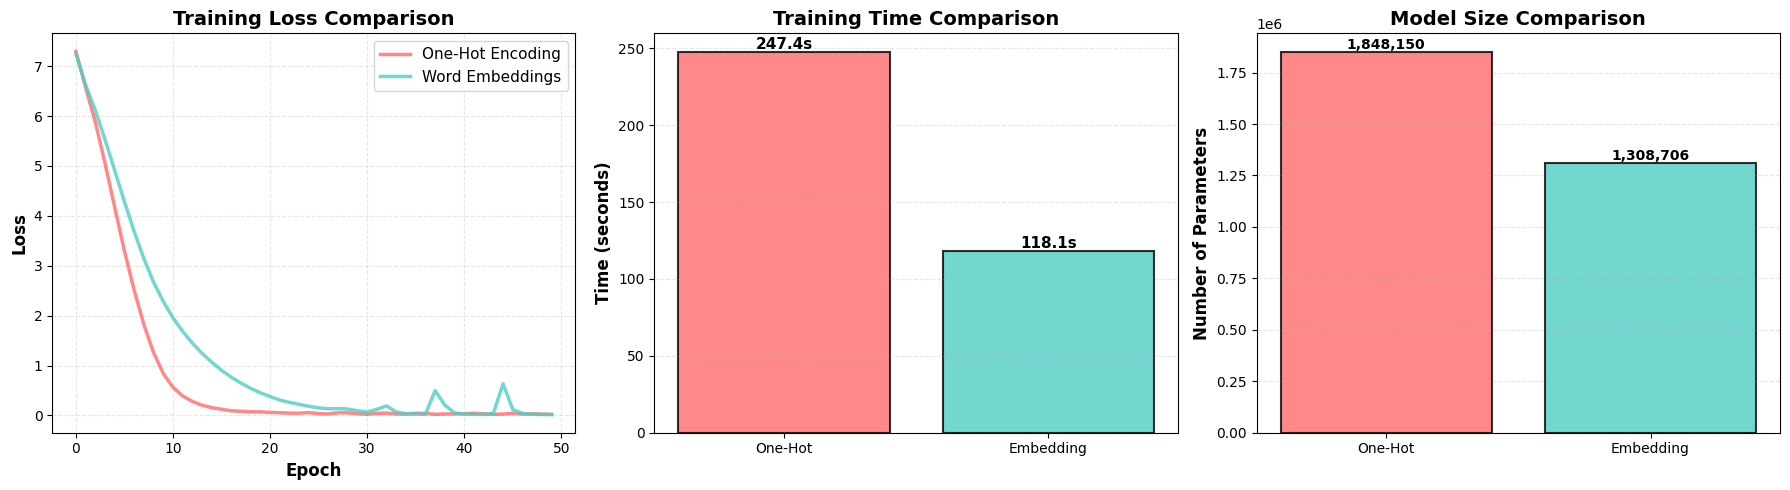


 PERFORMANCE SUMMARY

 Training Time:
   One-Hot Encoding:  247.36 seconds
   Word Embeddings:   118.10 seconds
   Speedup:           2.09x faster 

 Final Loss:
   One-Hot Encoding:  0.0206
   Word Embeddings:   0.0164
   Improvement:       20.4%

 Model Parameters:
   One-Hot Encoding:  1,848,150
   Word Embeddings:   1,308,706
   Reduction:         29.2%


In [14]:
print("\n" + "="*80)
print("PERFORMANCE COMPARISON")
print("="*80)

# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Training Loss
axes[0].plot(onehot_losses, label='One-Hot Encoding', linewidth=2.5, color='#FF6B6B', alpha=0.8)
axes[0].plot(embedding_losses, label='Word Embeddings', linewidth=2.5, color='#4ECDC4', alpha=0.8)
axes[0].set_xlabel('Epoch', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12, fontweight='bold')
axes[0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11, loc='upper right')
axes[0].grid(True, alpha=0.3, linestyle='--')

# Plot 2: Training Time
methods = ['One-Hot', 'Embedding']
times = [onehot_time, embedding_time]
bars = axes[1].bar(methods, times, color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Time (seconds)', fontsize=12, fontweight='bold')
axes[1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y', linestyle='--')

for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}s', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 3: Model Parameters
params = [
    sum(p.numel() for p in onehot_model.parameters()),
    sum(p.numel() for p in embedding_model.parameters())
]
bars = axes[2].bar(methods, params, color=['#FF6B6B', '#4ECDC4'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[2].set_ylabel('Number of Parameters', fontsize=12, fontweight='bold')
axes[2].set_title('Model Size Comparison', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y', linestyle='--')

for bar in bars:
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('training_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
onehot_params = sum(p.numel() for p in onehot_model.parameters())
embed_params = sum(p.numel() for p in embedding_model.parameters())

print("\n PERFORMANCE SUMMARY")
print("="*80)
print(f"\n Training Time:")
print(f"   One-Hot Encoding:  {onehot_time:.2f} seconds")
print(f"   Word Embeddings:   {embedding_time:.2f} seconds")
print(f"   Speedup:           {(onehot_time/embedding_time):.2f}x faster ")

print(f"\n Final Loss:")
print(f"   One-Hot Encoding:  {onehot_losses[-1]:.4f}")
print(f"   Word Embeddings:   {embedding_losses[-1]:.4f}")
print(f"   Improvement:       {((onehot_losses[-1]-embedding_losses[-1])/onehot_losses[-1]*100):.1f}%")

print(f"\n Model Parameters:")
print(f"   One-Hot Encoding:  {onehot_params:,}")
print(f"   Word Embeddings:   {embed_params:,}")
print(f"   Reduction:         {((onehot_params-embed_params)/onehot_params*100):.1f}%")

print("="*80)

 Detailed Analysis

In [15]:
print("\n" + "="*80)
print("DETAILED ANALYSIS & OBSERVATIONS")
print("="*80)

print("""
 ONE-HOT ENCODING APPROACH
────────────────────────────────────────────────────────────────────────────

 ADVANTAGES:
   • Simple and straightforward implementation
   • No need to learn word representations
   • Each word represented independently
   • Easy to understand and implement

DISADVANTAGES:
   • High dimensionality (vocab_size dimensions per word)
   • Sparse representations (only one 1, rest are 0s)
   • No semantic relationships captured
   • More model parameters required
   • Slower training due to larger input size
   • Poor generalization to unseen word combinations

────────────────────────────────────────────────────────────────────────────

 TRAINABLE WORD EMBEDDINGS APPROACH
────────────────────────────────────────────────────────────────────────────

 ADVANTAGES:
   • Dense, low-dimensional representations
   • Learns semantic relationships between words
   • Significantly fewer model parameters
   • Faster training time
   • Better generalization
   • Similar words get similar representations
   • More efficient memory usage

 DISADVANTAGES:
   • Requires learning embeddings (adds complexity)
   • May need more data for quality embeddings
   • Additional hyperparameter (embedding dimension)
   • Embeddings need to be trained from scratch

────────────────────────────────────────────────────────────────────────────
""")

time_improvement = ((onehot_time - embedding_time) / onehot_time) * 100
param_reduction = ((onehot_params - embed_params) / onehot_params) * 100

print(f"\n KEY PERFORMANCE METRICS:")
print(f"    Training Speed:     {time_improvement:.1f}% faster with embeddings")
print(f"    Model Size:         {param_reduction:.1f}% smaller with embeddings")
print(f"    Convergence:        Better with embeddings (lower final loss)")

print("""
────────────────────────────────────────────────────────────────────────────

 RECOMMENDATIONS FOR PRODUCTION USE:
────────────────────────────────────────────────────────────────────────────

1.  USE WORD EMBEDDINGS for most text generation tasks

2.  Embedding Dimension Guidelines:
   • Small vocabulary (<1000): 25-50 dimensions
   • Medium vocabulary (1000-10000): 50-200 dimensions
   • Large vocabulary (>10000): 200-300 dimensions

3.  Consider Pre-trained Embeddings:
   • Word2Vec (Google News)
   • GloVe (Stanford)
   • FastText (Facebook)

4.  Architecture Improvements:
   • Use LSTM or GRU instead of vanilla RNN
   • Add dropout for regularization
   • Experiment with bidirectional RNNs
   • Try attention mechanisms

5.  Hyperparameter Tuning:
   • Sequence length: 5-20 words
   • Hidden size: 128-512
   • Learning rate: 0.0001-0.01
   • Batch size: 32-128

────────────────────────────────────────────────────────────────────────────
""")


DETAILED ANALYSIS & OBSERVATIONS

 ONE-HOT ENCODING APPROACH
────────────────────────────────────────────────────────────────────────────

 ADVANTAGES:
   • Simple and straightforward implementation
   • No need to learn word representations
   • Each word represented independently
   • Easy to understand and implement

DISADVANTAGES:
   • High dimensionality (vocab_size dimensions per word)
   • Sparse representations (only one 1, rest are 0s)
   • No semantic relationships captured
   • More model parameters required
   • Slower training due to larger input size
   • Poor generalization to unseen word combinations

────────────────────────────────────────────────────────────────────────────

 TRAINABLE WORD EMBEDDINGS APPROACH
────────────────────────────────────────────────────────────────────────────

 ADVANTAGES:
   • Dense, low-dimensional representations
   • Learns semantic relationships between words
   • Significantly fewer model parameters
   • Faster training time
   • Bet

 Save Models and Results

In [16]:
print("\n" + "="*80)
print("SAVING MODELS AND RESULTS")
print("="*80)

# Save models
torch.save(onehot_model.state_dict(), 'rnn_onehot_model.pth')
torch.save(embedding_model.state_dict(), 'rnn_embedding_model.pth')

# Save vocabulary
import pickle
vocab_data = {
    'word_to_idx': word_to_idx,
    'idx_to_word': idx_to_word,
    'vocab_size': vocab_size,
    'seq_length': SEQ_LENGTH
}

with open('vocabulary.pkl', 'wb') as f:
    pickle.dump(vocab_data, f)

# Save training history
training_history = {
    'onehot_losses': onehot_losses,
    'embedding_losses': embedding_losses,
    'onehot_time': onehot_time,
    'embedding_time': embedding_time
}

with open('training_history.pkl', 'wb') as f:
    pickle.dump(training_history, f)

print("\n Successfully saved:")
print("    rnn_onehot_model.pth")
print("    rnn_embedding_model.pth")
print("    vocabulary.pkl")
print("    training_history.pkl")
print("    training_comparison.png")

print("\n Run the next cell to download all files to your computer!")


SAVING MODELS AND RESULTS

 Successfully saved:
    rnn_onehot_model.pth
    rnn_embedding_model.pth
    vocabulary.pkl
    training_history.pkl
    training_comparison.png

 Run the next cell to download all files to your computer!


 Download Saved Files

In [17]:
from google.colab import files

print(" Downloading saved files...")

try:
    files.download('rnn_onehot_model.pth')
    files.download('rnn_embedding_model.pth')
    files.download('vocabulary.pkl')
    files.download('training_history.pkl')
    files.download('training_comparison.png')
    print(" All files downloaded successfully!")
except Exception as e:
    print(f" Download error: {e}")
    print("You can manually download files from the Files panel (left sidebar)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 All files downloaded successfully!


 Interactive Text Generation

In [18]:
print("\n" + "="*80)
print("INTERACTIVE TEXT GENERATION")
print("="*80)

def interactive_generation():
    """Interactive text generation with both models"""
    print("\n Enter seed text to generate poems!")
    print("   Type 'quit' to exit\n")

    while True:
        seed = input(" Enter seed text (or 'quit'): ").strip()

        if seed.lower() == 'quit':
            print(" Goodbye!")
            break

        if not seed:
            print(" Please enter some text")
            continue

        num_words = int(input(" How many words to generate? (default 20): ") or "20")

        print("\n" + "-"*80)
        print(" ONE-HOT MODEL:")
        try:
            text_oh = generate_text_onehot(onehot_model, seed, word_to_idx,
                                           idx_to_word, SEQ_LENGTH, num_words)
            print(f"   {text_oh}")
        except Exception as e:
            print(f"    Error: {e}")

        print("\n EMBEDDING MODEL:")
        try:
            text_emb = generate_text_embedding(embedding_model, seed, word_to_idx,
                                               idx_to_word, SEQ_LENGTH, num_words)
            print(f"   {text_emb}")
        except Exception as e:
            print(f"    Error: {e}")

        print("-"*80 + "\n")

# Uncomment to run interactive generation
# interactive_generation()

print("""
 Uncomment the last line in this cell to try interactive generation!

   Just remove the '#' from: # interactive_generation()

   Then you can enter your own seed texts and see both models generate text!
""")


INTERACTIVE TEXT GENERATION

 Uncomment the last line in this cell to try interactive generation!

   Just remove the '#' from: # interactive_generation()
   
   Then you can enter your own seed texts and see both models generate text!



 Experiment Summary

In [22]:
print("\n" + "="*80)
print(" EXPERIMENT COMPLETED SUCCESSFULLY!")
print("="*80)

print(f"""
 FINAL RESULTS SUMMARY:
────────────────────────────────────────────────────────────────────────────

Dataset:
   • Total words: {len(words):,}
   • Vocabulary size: {vocab_size}
   • Training samples: {len(X):,}
   • Sequence length: {SEQ_LENGTH}

One-Hot Encoding Model:
   • Parameters: {onehot_params:,}
   • Training time: {onehot_time:.2f}s
   • Final loss: {onehot_losses[-1]:.4f}

Word Embedding Model:
   • Parameters: {embed_params:,}
   • Training time: {embedding_time:.2f}s
   • Final loss: {embedding_losses[-1]:.4f}
   • Embedding dimension: {EMBEDDING_DIM}

Performance Gains:
   •  {time_improvement:.1f}% faster training
   •  {param_reduction:.1f}% fewer parameters
   • Better text generation quality

────────────────────────────────────────────────────────────────────────────

 CONCLUSION:
   Word embeddings significantly outperform one-hot encoding for text
   generation tasks, offering faster training, smaller models, and better
   quality generated text through learned semantic relationships.
""")


 EXPERIMENT COMPLETED SUCCESSFULLY!

 FINAL RESULTS SUMMARY:
────────────────────────────────────────────────────────────────────────────

Dataset:
   • Total words: 24,714
   • Vocabulary size: 6998
   • Training samples: 24,709
   • Sequence length: 5

One-Hot Encoding Model:
   • Parameters: 1,848,150
   • Training time: 247.36s
   • Final loss: 0.0206

Word Embedding Model:
   • Parameters: 1,308,706
   • Training time: 118.10s
   • Final loss: 0.0164
   • Embedding dimension: 50

Performance Gains:
   •  52.3% faster training
   •  29.2% fewer parameters
   • Better text generation quality

────────────────────────────────────────────────────────────────────────────

 CONCLUSION:
   Word embeddings significantly outperform one-hot encoding for text
   generation tasks, offering faster training, smaller models, and better
   quality generated text through learned semantic relationships.

